In [1]:
import tensorflow as tf

## TensorFlow
TensorFlow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks. It is used for both research and production at Google, often replacing its closed-source predecessor, DistBelief.

TensorFlow computations are expressed as stateful dataflow graphs. The name TensorFlow derives from the operations that such neural networks perform on multidimensional data arrays. These arrays are referred to as "tensors". In June 2016, Dean stated that 1,500 repositories on GitHub mentioned TensorFlow, of which only 5 were from Google.

TensorFlow is cross-platform. It runs on nearly everything: GPUs and CPUs—including mobile and embedded platforms—and even tensor processing units (TPUs), which are specialized hardware to do tensor math on.

![title](1tensorflow.png)


The TensorFlow distributed execution engine abstracts away the many supported devices and provides a high performance-core implemented in C++ for the TensorFlow platform.
On top of that sit the Python and C++ frontends (with more to come). The Layers API provides a simpler interface for commonly used layers in deep learning models. On top of that sit higher-level APIs, including Keras (more on the Keras.io site) and the Estimator API, which makes training and evaluating distributed models easier.

## Graphs
Machine learning can get complex quickly, and deep learning models can become large. For many model graphs, you need distributed training to be able to iterate within a reasonable time frame. And, you'll typically want the models you develop to deploy to multiple platforms.

With the current version of TensorFlow, you write code to build a computation graph, then execute it. The graph is a data structure that fully describes the computation you want to perform. This has lots of advantages:

It's portable, as the graph can be executed immediately or saved to use later, and it can run on multiple platforms: CPUs, GPUs, TPUs, mobile, embedded. Also, it can be deployed to production without having to depend on any of the code that built the graph, only the runtime necessary to execute it.
It's transformable and optimizable, as the graph can be transformed to produce a more optimal version for a given platform. Also, memory or compute optimizations can be performed and trade-offs made between them. This is useful, for example, in supporting faster mobile inference after training on larger machines.
Support for distributed execution
TensorFlow's high-level APIs, in conjunction with computation graphs, enable a rich and flexible development environment and powerful production capabilities in the same framework.

## Constants 
https://www.tensorflow.org/api_docs/python/tf/constant

In [6]:
sess=tf.Session()
a=tf.constant(6)
b=tf.constant(3)
a   # contains a constant tensor see type

<tf.Tensor 'Const_2:0' shape=() dtype=int32>

In [7]:
#to print we should run the session 
sess.run(a)

6

In [8]:
# constants can be 2D matrices, strings etc.
a1 = tf.constant([[3,3]])
a2 = tf.constant([[3,2],[3,3]])
res = tf.matmul(a1, a2)
sess.run(res)


array([[18, 15]])

In [9]:
a=tf.constant(8)
a=tf.constant(28) # is perfectly valid as a new tensor object is created here 

sess.run(a)

28

## Variables
https://www.tensorflow.org/api_docs/python/tf/Variable

A variable maintains state in the graph across calls to run(). You add a variable to the graph by constructing an instance of the class Variable.

In [10]:
var1= tf.Variable(100)
sess.run(var1) # generates an error because a variable is supposed to be explicitly intialized 

Instructions for updating:
Colocations handled automatically by placer.


FailedPreconditionError: Attempting to use uninitialized value Variable
	 [[{{node _retval_Variable_0_0}}]]

In [11]:
sess.run(tf.global_variables_initializer()) # initializing global variable var1 now
temp=var1.assign(122)  #assign will assign values to variable
sess.run(var1)  #var1 containes old value because assign is not run yet in session 

100

In [12]:
sess.run(temp) # now var1 has new value

122

In [13]:
var1 = tf.Variable(100)
var2 = tf.Variable(200)

sess.run(tf.global_variables_initializer())
var3 = tf.Variable(300)   ## this is created after global initializer was called hence error is generated in next line
sess.run(var3)

FailedPreconditionError: Attempting to use uninitialized value Variable_3
	 [[{{node _retval_Variable_3_0_0}}]]

## Placeholders 
https://www.tensorflow.org/api_docs/python/tf/placeholder

Placeholders are used when values are supposed to be provided later. 

In [14]:
x =tf.placeholder(tf.int32) #type is supposed to be specified 
y =tf.placeholder(tf.int32)

In [15]:
v = 3 * x
sess = tf.Session()
sess.run(v)  # error is generated as v is supposed to use values present in x, which are not provided yet 

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype int32
	 [[node Placeholder (defined at <ipython-input-14-ecf1a5c6c857>:1) ]]

Caused by op 'Placeholder', defined at:
  File "C:\preeti\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\preeti\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\preeti\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\preeti\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\preeti\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\preeti\Anaconda3\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "C:\preeti\Anaconda3\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "C:\preeti\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\preeti\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\preeti\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\preeti\Anaconda3\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\preeti\Anaconda3\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\preeti\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\preeti\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\preeti\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\preeti\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\preeti\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\preeti\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\preeti\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\preeti\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\preeti\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\preeti\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\preeti\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\preeti\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\preeti\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\preeti\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-ecf1a5c6c857>", line 1, in <module>
    x =tf.placeholder(tf.int32) #type is supposed to be specified
  File "C:\preeti\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 2077, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\preeti\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5790, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\preeti\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\preeti\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\preeti\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\preeti\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype int32
	 [[node Placeholder (defined at <ipython-input-14-ecf1a5c6c857>:1) ]]


In [ ]:
# to pass values we need to provide a dictionary 
sess.run(v,feed_dict={x:20}) # see it only requires the values which would be required to compute v hence y value was not asked 

In [16]:
# we can create multidimensional placeholders also 
x =tf.placeholder(tf.int32,shape=(2,2))
y = x * tf.constant(12)
sess.run(y, feed_dict={x:[[1,2], [4,5]]})

array([[12, 24],
       [48, 60]])

# Neural Networks using TensorFlow 

In [2]:

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import  input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

W0705 13:08:36.642595 10500 deprecation.py:323] From <ipython-input-3-27afc53753d9>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0705 13:08:36.650775 10500 deprecation.py:323] From C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0705 13:08:36.705492 10500 deprecation.py:323] From C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0705 13:10:00.381472 10500 deprecation.py:323] From C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0705 13:10:00.381472 10500 deprecation.py:323] From C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0705 13:10:11.600581 10500 deprecation.py:323] From C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

In [5]:
mnist.test.images.shape,mnist.test.labels.shape

((10000, 784), (10000, 10))

In [6]:
mnist.validation.images.shape,mnist.validation.labels.shape

((5000, 784), (5000, 10))

In [13]:
image1=mnist.train.images[4198]
image1=np.array(image1,float)
image1=image1.reshape((28,28))

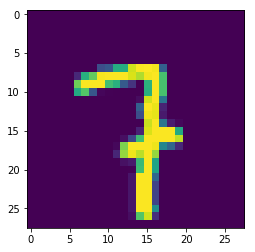

In [14]:
plt.imshow(image1)
plt.show()

In [15]:
n_input=784
n_hl1=256
n_hl2=256
n_output=10

weights={
    'h1':tf.Variable(tf.random_normal(shape=(n_input,n_hl1))),  # weight matrix for layer 1
    'h2':tf.Variable(tf.random_normal(shape=(n_hl1,n_hl2))),    # weight matrix for layer 2
    'out':tf.Variable(tf.random_normal(shape=(n_hl2,n_output))) # weight matrix for layer 3
}
biases={
    'h1':tf.Variable(tf.random_normal(shape=(n_hl1,))),         # biases for layer 1
    'h2':tf.Variable(tf.random_normal(shape=(n_hl2,))),         # biases for layer 1
    'out':tf.Variable(tf.random_normal(shape=(n_output,)))      # biases for layer 1
}

In [16]:
def fwd_prop(x,weights,biases):
    layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    layer1=tf.nn.relu(layer1)  #activation 
    
    layer2=tf.add(tf.matmul(layer1,weights['h2']),biases['h2'])
    layer2=tf.nn.relu(layer2)
    
    output=tf.add(tf.matmul(layer2,weights['out']),biases['out'])
    return output

In [17]:


x=tf.placeholder('float',[None,n_input])      #since no. of input instance is different for training and testing
y=tf.placeholder(tf.int32,[None,n_output])

pred=fwd_prop(x,weights,biases)




In [18]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y)) #logits is because of multiple classes 

In [19]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)

In [20]:
optimize=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [21]:
batch_size=100
for i in range(25):
    num_batches=mnist.train.num_examples//batch_size
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost)    

26569.282738268375
4535.693647451699
2453.679872374466
1639.6571839704573
1491.7314633865512
1143.045912543765
967.266206920901
962.6837487007655
832.3399037083435
785.9780219223237
639.5834727276124
637.5528200423531
575.2831589955839
448.71054086390444
435.6987303219358
320.1629956443456
284.8943758570305
299.31735597635475
275.93844517017453
261.18572556479637
212.09155690458948
147.4500900704001
226.3046864389584
148.9629907034623
149.433850913188


In [25]:
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_preds=tf.equal(predictions,true_labels)
correct_ones,labels,correct_preds=sess.run([predictions, true_labels,correct_preds],feed_dict={x:mnist.test.images,y:mnist.test.labels})
correct_ones,labels,correct_preds

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [22]:
tf.trainable_variables() #checking trainable variables 

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

In [38]:
#non sequential model has two simultaneous inputs of two diiferent types that require different NN then at some point their o/p combine